In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load house price dataset
data = pd.read_csv("./houses_dataset/data.csv")

In [3]:
desc_df = data.describe()
desc_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


### Visualize Mean and Std

In [4]:
df_mean_std = desc_df.loc["mean":"std"]
df_mean_std = df_mean_std.transpose()
# Get features with mean less than 10
df_mean_std = df_mean_std[df_mean_std["mean"] < 10]
df_mean_std

,mean,std
bedrooms,3.400870,0.908848
bathrooms,2.160815,0.783781
floors,1.512065,0.538288
waterfront,0.007174,0.084404
view,0.240652,0.778405
condition,3.451739,0.677230


<AxesSubplot:title={'center':'Mean & Std'}>

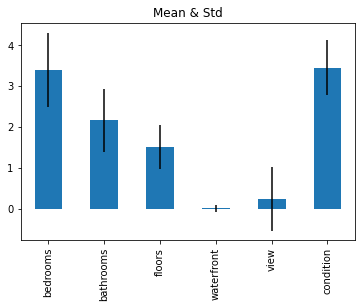

In [5]:
df_mean_std.plot(kind = "bar", y = "mean", 
        yerr = "std", legend = False, 
        title = "Mean & Std")

### Visualize Quantiles

In [6]:
df_quantiles = desc_df.loc["min":"max"]
df_quantiles

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
min,0.000000e+00,0.0,0.00,370.0,638.00,1.0,0.0,0.0,1.0,370.0,0.0,1900.0,0.0
25%,3.228750e+05,3.0,1.75,1460.0,5000.75,1.0,0.0,0.0,3.0,1190.0,0.0,1951.0,0.0
50%,4.609435e+05,3.0,2.25,1980.0,7683.00,1.5,0.0,0.0,3.0,1590.0,0.0,1976.0,0.0
75%,6.549625e+05,4.0,2.50,2620.0,11001.25,2.0,0.0,0.0,4.0,2300.0,610.0,1997.0,1999.0
max,2.659000e+07,9.0,8.00,13540.0,1074218.00,3.5,1.0,4.0,5.0,9410.0,4820.0,2014.0,2014.0


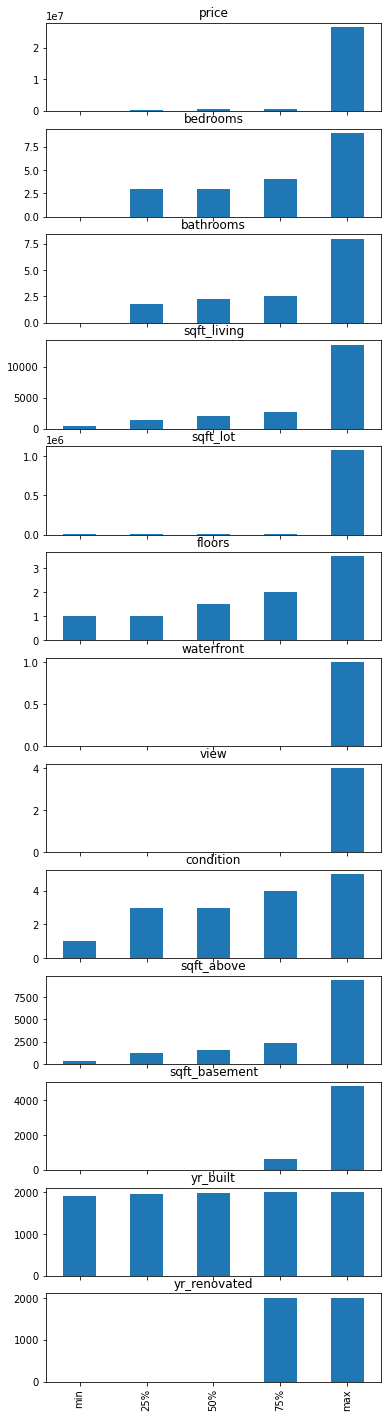

In [7]:
fig, axs = plt.subplots(
    nrows=len(df_quantiles.columns), 
    ncols=1, sharex=True)
fig.set_figheight(25)

for name, ax in zip(df_quantiles.columns, axs):
    df_quantiles[name].plot(kind="bar", 
                        legend=False, ax=ax)
    ax.set_title(name)